In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from IPython.display import display

In [273]:
# ---------------------------------
# Code  Description
# ---------------------------------
# e	The value has been edited or estimated by USGS personnel.
# <	The Value is known to be less than reported value.
# >	The value is known to be greater than reported value.
# R	Records for these data have been revised.
# A	Approved for publication -- Processing and review completed.
# P	Provisional data subject to revision.

In [274]:
#Testing with percentiles
def twenty_per_less(num):
    
    print("20 percent less than ", num, "is" ,(num * 0.8))

def CCDF_baseflow(file_name):

    df = pd.read_csv(file_name+".csv")

    print("Baseflow Information: \n")
    
    august_data = df[df['month_nu'] == 8]

    average_august_value = august_data['mean_va'].mean()
    print("Avg Aug Val: ", average_august_value)

    per_fifty_average_august_value = august_data['p50_va'].mean()
    print("50% Avg Aug Val: ", per_fifty_average_august_value)

    twenty_per_less(average_august_value)
    twenty_per_less(per_fifty_average_august_value)


In [275]:
#Spring Storms Data (percentiles)
def CCDF_spring_storms(file_name):

    df = pd.read_csv(file_name+".csv")

    print("Spring Storms Information: \n")

    eighty_per = df.loc[(df['month_nu'] >= 4) & (df['month_nu'] <= 6) & (df['day_nu'] >= 15) & (df['day_nu'] <= 30), 'p80_va']
    twenty_per = df.loc[(df['month_nu'] >= 4) & (df['month_nu'] <= 6) & (df['day_nu'] >= 15) & (df['day_nu'] <= 30), 'p20_va']

    eighty_mean_vals = eighty_per.mean()
    twenty_mean_vals = twenty_per.mean()

    print(eighty_mean_vals)
    print(twenty_mean_vals)



In [276]:
#Testing with Average Daily Exceedance Flow Equation
def CCDF_aug_avg_daily_exceedance_flow(file_name):

    df = pd.read_csv(file_name + ".csv")

    august_data = df[df['month_nu'] == 8].copy()

    august_data['ranked_column_m'] = august_data['mean_va'].rank(method='first', ascending=False)

    august_data['row_number'] = range(1, len(august_data) + 1)

    august_data['P_vals'] = float('nan')

    n = len(august_data)

    for index, row in august_data.iterrows():
        P = 100 * ((row['ranked_column_m'])/(n + 1))
        august_data.at[index, 'P_vals'] = P

    #print(august_data)
    print(august_data['P_vals'])

    august_data.sort_values(by= ['mean_va', 'P_vals'], ascending=False)

    plt.figure(figsize=(10, 6))
    plt.plot(august_data['P_vals'], august_data['mean_va'], marker='o', linestyle='-', color='b')
    plt.xlabel('Exceedance Probability (%)')
    plt.ylabel('Mean Daily Flow (mean_va)')
    plt.title('Exceedance Probability Plot for August')
    plt.grid(True)
    plt.show()

    P_value_to_find = 50
    mean_va_at_50 = np.interp(P_value_to_find, august_data['P_vals'], august_data['mean_va'])

    print(mean_va_at_50)

In [277]:
#Testing with Average Daily Exceedance Flow Equation
def CCDF_spring_flow_avg_daily_exceedance_flow(file_name):

    df = pd.read_csv(file_name + ".csv")

    #spring_data = df.loc[(df['month_nu'] >= 4) & (df['month_nu'] <= 6) & (df['day_nu'] >= 15) & (df['day_nu'] <= 30), 'mean_va'].copy()

    spring_data = df.loc[(df['month_nu'] >= 4) & (df['month_nu'] <= 6) & (df['day_nu'] >= 15) & (df['day_nu'] <= 30)].copy() #april 15- june 30

    print(type(spring_data))

    print(spring_data.head())

    #spring_data['ranked_column_m'] = spring_data['mean_va'].rank(ascending=False)

    spring_data['ranked_column_m'] = spring_data['mean_va'].rank(method='first', ascending=False)

    spring_data['row_number'] = range(1, len(spring_data) + 1)

    spring_data['P_vals'] = float('nan')

    n = len(spring_data)

    for index, row in spring_data.iterrows():
        P = 100 * ((row['ranked_column_m'])/(n + 1))
        spring_data.at[index, 'P_vals'] = P

    #print(spring_data)
    print(spring_data['P_vals'])

    plt.figure(figsize=(10, 6))
    plt.plot(spring_data['P_vals'], spring_data['mean_va'], marker='o', linestyle='-', color='b')
    plt.xlabel('Exceedance Probability (%)')
    plt.ylabel('Mean Daily Flow (mean_va)')
    plt.title('Exceedance Probability Plot for August')
    plt.grid(True)
    plt.show()

    P_value_to_find = 50
    mean_va_at_50 = np.interp(P_value_to_find, spring_data['P_vals'], spring_data['mean_va'])

    print(mean_va_at_50)

213    25.000
214    37.500
215    31.250
216    40.625
217    46.875
218    56.250
219    65.625
220    53.125
221     6.250
222     3.125
223     9.375
224    12.500
225    15.625
226    18.750
227    21.875
228    28.125
229    34.375
230    43.750
231    50.000
232    59.375
233    62.500
234    68.750
235    71.875
236    75.000
237    96.875
238    90.625
239    81.250
240    84.375
241    78.125
242    87.500
243    93.750
Name: P_vals, dtype: float64


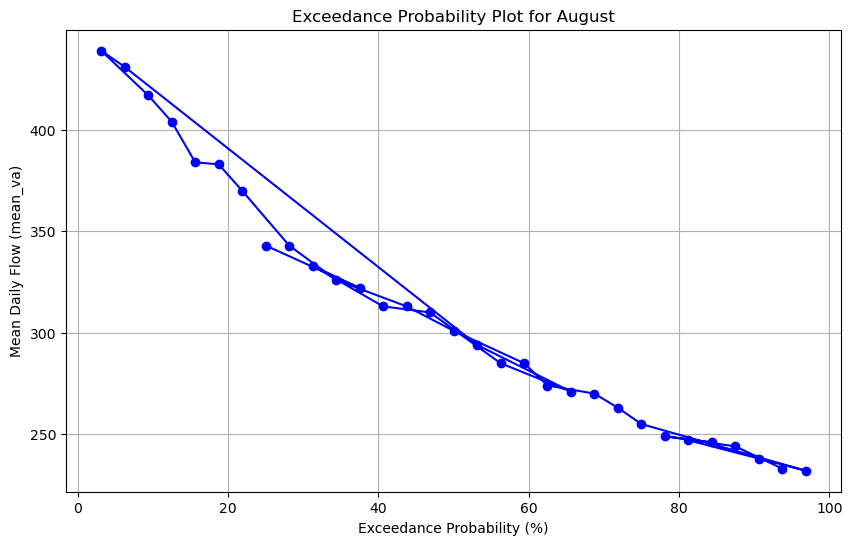

301.0


In [278]:
# CCDF_baseflow('wallstreet_data')
# CCDF_spring_storms('wallstreet_data')

CCDF_aug_avg_daily_exceedance_flow('wallstreet_data')
#CCDF_aug_avg_daily_exceedance_flow('wallstreet_aug_data')
# CCDF_spring_flow_avg_daily_exceedance_flow('wallstreet_data')